In [3]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [4]:
img = image.load_img(r'D:\End To End ML\hackhathon\train\2.jpg',target_size=(224,224))

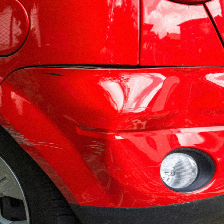

In [5]:
img

In [6]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [7]:
img = image.img_to_array(img)

In [8]:
img.shape

(224, 224, 3)

In [9]:
input_batch = img.reshape(1,224,224,3)

In [11]:
i = 0

for output in datagen.flow(input_batch,batch_size=1,save_to_dir='aug'):
    i = i + 1
    if i == 10:
        break

In [22]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Load CSV file
csv_file = r'D:\End To End ML\hackhathon\train.csv'
df = pd.read_csv(csv_file)

# Split the dataset into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# Define ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Output directory for augmented images
output_directory = 'augmented_images'
os.makedirs(output_directory, exist_ok=True)

# Data augmentation for the training set
train_datagen = ImageDataGenerator(rescale=1./255)

# Create a dictionary to store class distribution
class_distribution = df['label'].value_counts().to_dict()

# Define the target distribution for each class (you can adjust these values)
target_distribution = {
    1: 9829,
    2: 7651,
    3: 9466,
    4: 7921,
    5: 8815,
    6: 9118
}

# Calculate the augmentation factor for each class
augmentation_factors = {label: target_distribution[label] // class_distribution[label] for label in class_distribution}

# Function to generate augmented data for a given class
def generate_augmented_data(df, datagen, class_label, augmentation_factor):
    augmented_data = []
    class_data = df[df['label'] == class_label]

    for index, row in class_data.iterrows():
        img = load_img(r'D:/End To End ML/hackhathon/train/' + row['filename'], target_size=(224, 224))
        img_array = img_to_array(img)
        img_array = img_array / 255.0

        for i in range(augmentation_factor):
            augmented_img = datagen.random_transform(img_array)
            augmented_data.append({'image_id':f"{row['filename']}",'filename': f"{row['filename']}_aug_{i}.jpg", 'label': class_label})
            img_path = os.path.join(output_directory, f"{row['filename']}_aug_{i}.jpg")
            img.save(img_path)
            
    return augmented_data

# Generate augmented data for each class and combine with the original training data
augmented_data = []

for class_label, augmentation_factor in augmentation_factors.items():
    augmented_data.extend(generate_augmented_data(train_df, train_datagen, class_label, augmentation_factor))

# Combine augmented data with the original training data
augmented_df = pd.DataFrame(augmented_data)
augmented_train_df = pd.concat([train_df, augmented_df], ignore_index=True)

# Save the augmented data to a new CSV file
augmented_train_df.to_csv('augmented_train_data.csv', index=False)
